# Exploratory Data Analysis

## Dataset used: Titanic - Machine Learning from Disaster

![Titanic](data/titanic.png)

<br>

## Content

- [Introduction](#1)
- [Prepare for data analysis](#2)
- [Data exploration and first glance](#3)
- [Data Cleaning](#4)
- [Data Visualization](#5)
- [Data Distribution](#6)
- [Features correlations](#7)
- [Outlier detection](#8)
- [Feature engineering](#9)
- [Data preprocessing](#10)


# <a id='1'>Introduction</a>  

Exploratory Data Analysis (EDA) is a crucial step in preparing data for machine learning. It helps you understand your data, discover patterns, identify outliers, and make informed decisions about data preprocessing and feature engineering. Following is a script which I follow for most of the exploratory tasks.


# <a id='2'>Prepare for data analysis</a>  


## Load packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load datae.

In [2]:
dfTrain = pd.read_csv('data/titanic/train.csv')
dfTest = pd.read_csv('data/titanic/test.csv')
dfGender = pd.read_csv('data/titanic/gender_submission.csv')

# <a id='3'>Data exploration</a>  

## <a id='31'>Check the data</a>  

Let's check the train and test set.

In [3]:
dfTrain.shape, dfTest.shape

((891, 12), (418, 11))

In [4]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dfTrain['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
dfTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dfTest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
def missing_data(data):
    """
    Analyzes missing data in a pandas DataFrame and generates a summary table.

    Parameters:
    data (pandas.DataFrame): The input DataFrame to be analyzed for missing data.

    Returns:
    pandas.DataFrame: A summary table with columns 'Total' (count of missing values), 'Percent' (percentage of missing values),
    and 'Types' (data types) for each column in the input DataFrame.

    Example:
    >>> import pandas as pd
    >>> data = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [np.nan, 2, 3, 4], 'C': ['apple', 'banana', 'cherry', None]})
    >>> missing_data_summary = missing_data(data)
    >>> print(missing_data_summary)
          Total   Percent    Types
    A          1     25.0%  float64
    B          1     25.0%  float64
    C          1     25.0%   object
    """

    total = data.isnull().sum()
    percent = (data.isnull().sum() / data.isnull().count() * 100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return np.transpose(tt)


In [10]:
missing_data(dfTrain)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [11]:
missing_data(dfTest)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [12]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
dfTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
women = dfTrain.loc[dfTrain.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

men = dfTrain.loc[dfTrain.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)*100

print("Percentage of women who survived :", rate_women)
print("Percentage of men who survived   :", rate_men)

Percentage of women who survived : 74.20382165605095
Percentage of men who survived   : 18.890814558058924


In [15]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Example: Encode 'Sex' and 'Embarked' columns using one-hot encoding
# dfTrain = pd.get_dummies(dfTrain, columns=['Sex', 'Embarked'], drop_first=True)


In [17]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <a id='4'>Data cleaning</a>  

- Check for missing values and decide how to handle them (impute or remove).- 
Check for duplicated data points and remove them if necessary.

In [18]:
dfTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
!pip list

Package               Version
--------------------- ------------
backcall              0.2.0
contourpy             1.1.1
cycler                0.12.1
executing             2.0.0
fastjsonschema        2.18.1
fonttools             4.43.1
json5                 0.9.14
kiwisolver            1.4.5
matplotlib            3.8.0
missingno             0.5.2
numpy                 1.26.1
packaging             23.2
pandas                2.1.1
pickleshare           0.7.5
Pillow                10.1.0
pip                   23.3.1
ply                   3.11
pure-eval             0.2.2
pyparsing             3.1.1
python-dateutil       2.8.2
pytz                  2023.3.post1
pywin32               306
pyzmq                 25.1.1
rfc3986-validator     0.1.1
rpds-py               0.10.6
scipy                 1.11.3
seaborn               0.13.0
Send2Trash            1.8.2
six                   1.16.0
sniffio               1.3.0
soupsieve             2.5
tinycss2              1.2.1
tornado               6.3.

In [20]:
!pip install missingno

In [21]:
# import missingno as msno
# msno.bar(dfTrain)

In [22]:
missing_data(dfTrain)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [23]:
missing_data(dfTest)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [24]:
whole_data = pd.concat([dfTrain, dfTest], ignore_index=True)
whole_data['Title'] = whole_data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
title_counts = whole_data['Title'].value_counts()

print(title_counts)

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64


In [25]:
dfTrain.drop('Name', axis=1, inplace=True)
dfTest.drop('Name', axis=1, inplace=True)

dfTrain.drop('Cabin', axis=1, inplace=True)
dfTest.drop('Cabin', axis=1, inplace=True)

dfTrain.drop('Ticket', axis=1, inplace=True)
dfTest.drop('Ticket', axis=1, inplace=True)

In [26]:
dfTrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
dfTest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([dfTrain, dfTest], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [29]:
df_all = concat_df(dfTrain, dfTest)

df_all['Embarked'] = df_all['Embarked'].fillna('S')

med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

df_all['Age'] = df_all.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [30]:
df_all.isna().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [31]:
dfTrain.fillna(29.6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,29.6,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [32]:
dfTrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

## <a id='5'>Data visualisation</a>  

- Create visualizations to gain insights into your data. Use libraries like Matplotlib, Seaborn, or Plotly for this purpose.

<Axes: xlabel='Sex', ylabel='Survived'>

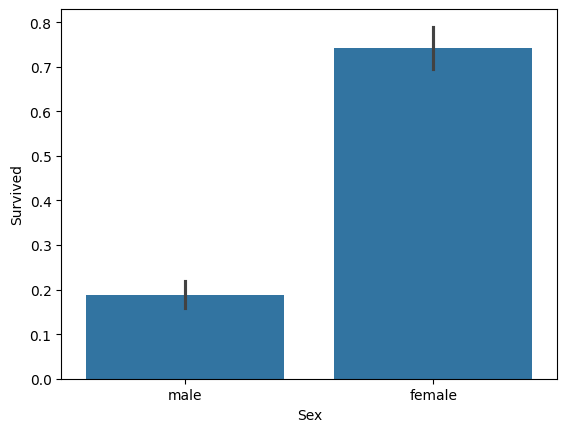

In [33]:
sns.barplot(x='Sex', y='Survived', data=dfTrain)

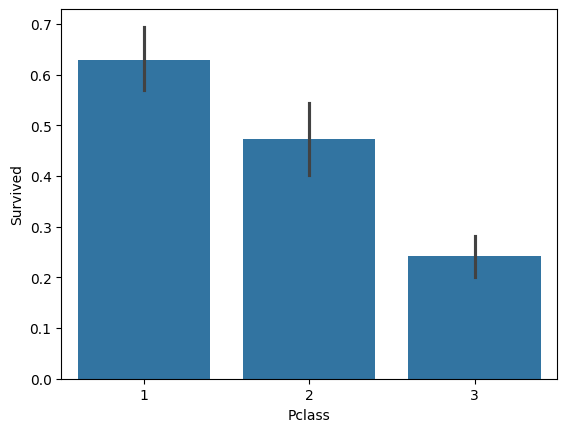

In [34]:
sns.barplot(x="Pclass", y="Survived", data=dfTrain)
plt.show()

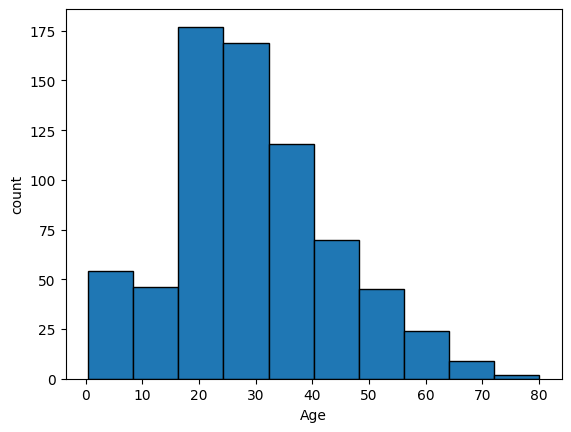

In [35]:
plt.hist(dfTrain.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

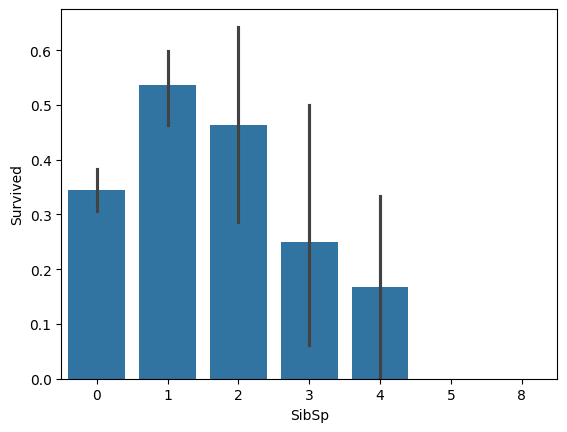

In [36]:
sns.barplot(x='SibSp', y='Survived', data=dfTrain)
plt.show()

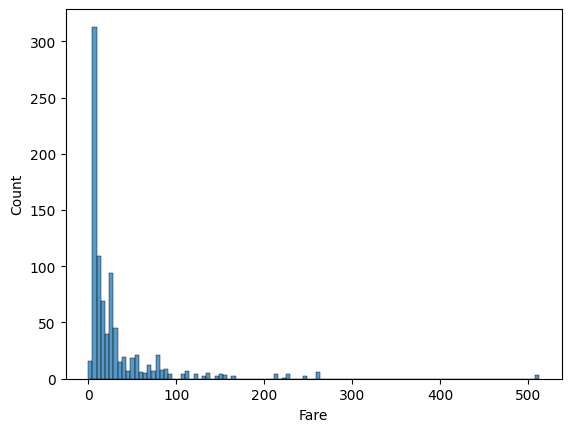

In [37]:
sns.histplot(dfTrain.Fare)
plt.show()

In [38]:
def bar_chart(feature):
    survived = dfTrain[dfTrain['Survived']==1][feature].value_counts()
    dead = dfTrain[dfTrain['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

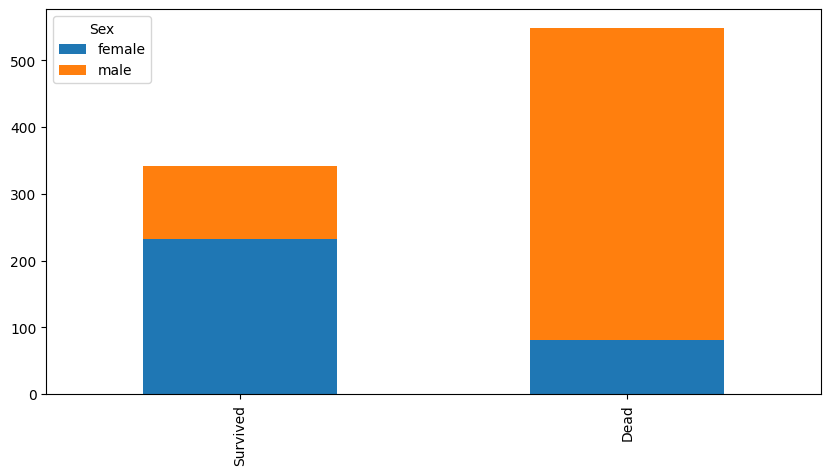

In [39]:
bar_chart('Sex')

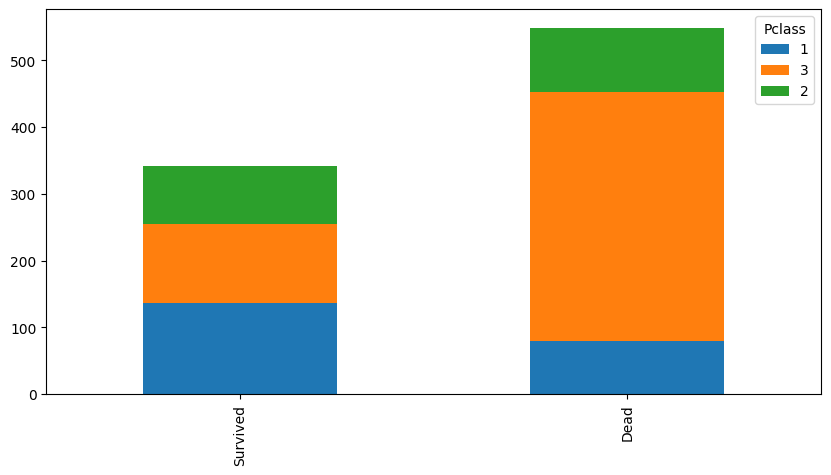

In [40]:
bar_chart('Pclass')

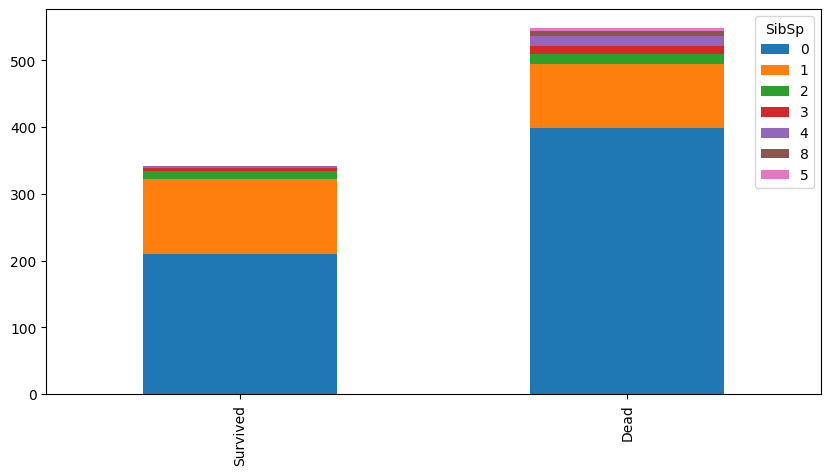

In [41]:
bar_chart('SibSp')

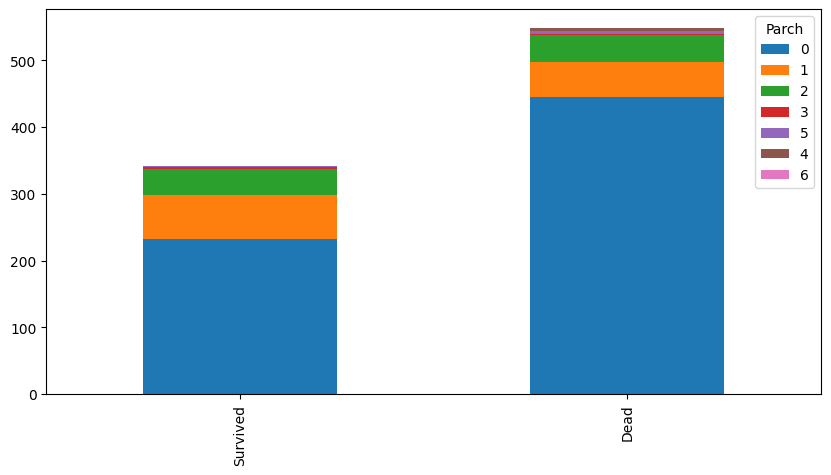

In [42]:
bar_chart('Parch')

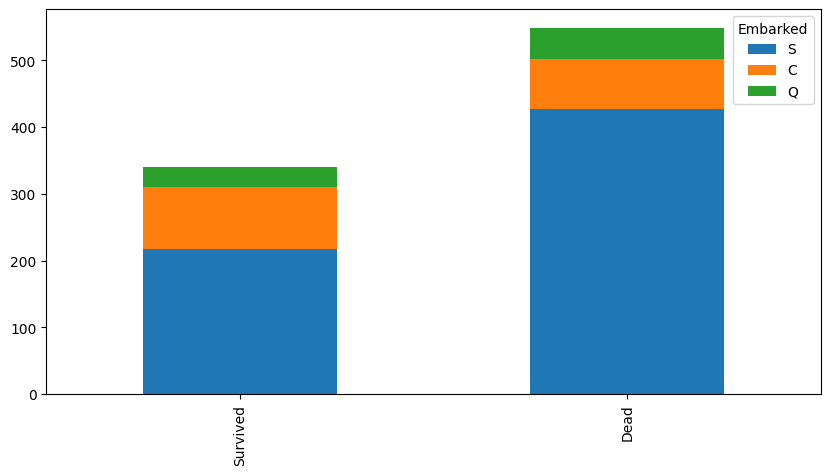

In [43]:
bar_chart('Embarked')

C:\Users\pradi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


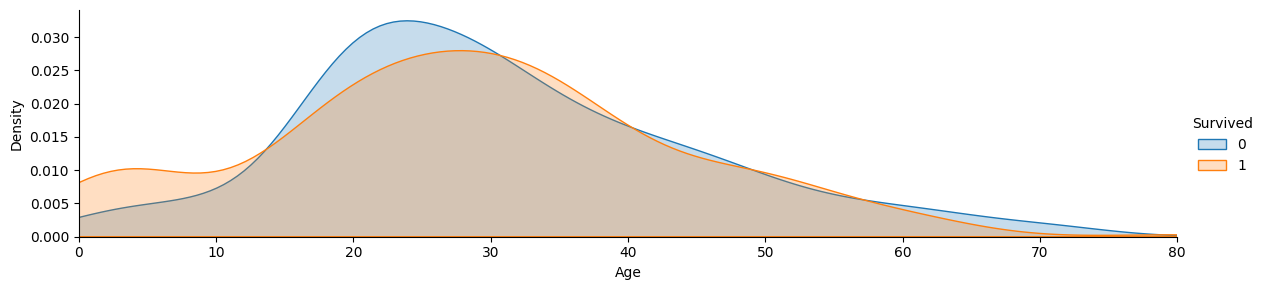

In [44]:
facet = sns.FacetGrid(dfTrain, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, dfTrain['Age'].max()))
facet.add_legend()

plt.show() 

### Outliers in age

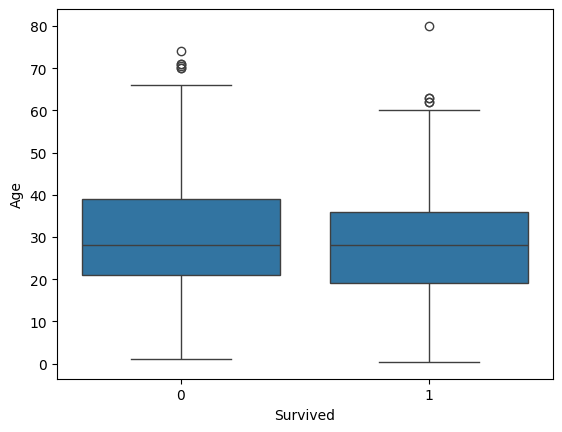

In [45]:
sns.boxplot(x='Survived', y='Age', data=dfTrain)
plt.show()

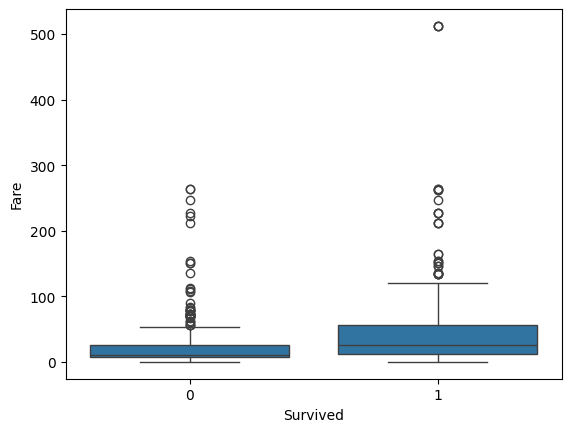

In [46]:
sns.boxplot(x='Survived', y='Fare', data=dfTrain)
plt.show()